In [17]:
# Functions to use

import mne
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd 

In [16]:


#DATA LOAD

file_path = 'C:/Users/denis/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PhD/Congresos, estancias, etc/UBC/Mitacs/Project/Participants'
subject='8'


file_D0 = file_path + '/P' + subject + '/D0-epo.fif'
file_D1 = file_path + '/P' + subject + '/D1-epo.fif'
file_D2 = file_path + '/P' + subject + '/D2-epo.fif'
file_D3 = file_path + '/P' + subject + '/D3-epo.fif' 

file_ND0 = file_path + '/P' + subject + '/ND0-epo.fif'
file_ND1 = file_path + '/P' + subject + '/ND1-epo.fif'
file_ND2 = file_path + '/P' + subject + '/ND2-epo.fif'
file_ND3 = file_path + '/P' + subject + '/ND3-epo.fif'  

# Load the data from each file
epochs_D0 = mne.read_epochs(file_D0)
epochs_D1 = mne.read_epochs(file_D1)
epochs_D2 = mne.read_epochs(file_D2)
epochs_D3 = mne.read_epochs(file_D3)

epochs_ND0 = mne.read_epochs(file_ND0)
epochs_ND1 = mne.read_epochs(file_ND1)
epochs_ND2 = mne.read_epochs(file_ND2)
epochs_ND3 = mne.read_epochs(file_ND3)

# Function to convert data to microvolts
def convert_to_microvolts(epoch_data):
    return epoch_data * 1e6

# Concatenate the epochs for each class
epochs_D = mne.concatenate_epochs([epochs_D0, epochs_D1, epochs_D2, epochs_D3])
epochs_ND = mne.concatenate_epochs([epochs_ND0, epochs_ND1, epochs_ND2, epochs_ND3])

# Apply the conversion to each epoch
epochs_D.apply_function(convert_to_microvolts)
epochs_ND.apply_function(convert_to_microvolts)


# Create labels for each class
# Class 1 for D0 and D1
labels_D = [1] * len(epochs_D)

# Class 0 for ND0 and ND1
labels_ND = [0] * len(epochs_ND)

# Combine the epochs from both classes
epochs_all = mne.concatenate_epochs([epochs_D, epochs_ND])

# Combine the labels
labels_all = labels_D + labels_ND

# Convert labels to numpy array for further processing
labels_all = np.array(labels_all)

# Print information about the combined data
print(f"Total epochs: {len(epochs_all)}")
print(f"Labels distribution: {np.bincount(labels_all)}")

# Get information about the channels
n_channels = epochs_all.info['nchan']
channel_names = epochs_all.info['ch_names']
sfreq = epochs_all.info['sfreq']

print(f"Number of channels: {n_channels}")
print(f"Channel names: {channel_names}")
print(f"sfreq: {sfreq}")

# Calculate the min and max values for the D condition
data_D = epochs_D.get_data()  # Shape is (n_epochs, n_channels, n_times)
min_val_D = data_D.min()
max_val_D = data_D.max()


print(f'Data range for D condition: min = {min_val_D}, max = {max_val_D}')


Reading C:\Users\denis\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\PhD\Congresos, estancias, etc\UBC\Mitacs\Project\Participants\P8\D0-epo.fif ...
    Found the data of interest:
        t =       0.00 ...     996.00 ms
        0 CTF compensation matrices available
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\denis\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\PhD\Congresos, estancias, etc\UBC\Mitacs\Project\Participants\P8\D1-epo.fif ...
    Found the data of interest:
        t =       0.00 ...     996.00 ms
        0 CTF compensation matrices available
Not setting metadata
108 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\denis\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\PhD\Congresos, estancias, etc\UBC\Mitacs\Project\Participants\P8\D2-epo.fif ...
    Found the data of inte

C:\Users\denis\AppData\Local\Temp\ipykernel_19268\4105836252.py:34: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_D = mne.concatenate_epochs([epochs_D0, epochs_D1, epochs_D2, epochs_D3])
C:\Users\denis\AppData\Local\Temp\ipykernel_19268\4105836252.py:35: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_ND = mne.concatenate_epochs([epochs_ND0, epochs_ND1, epochs_ND2, epochs_ND3])


Not setting metadata
983 matching events found
No baseline correction applied
Total epochs: 983
Labels distribution: [501 482]
Number of channels: 62
Channel names: ['1Z', '2Z', '3Z', '4Z', '6Z', '7Z', '8Z', '9Z', '1L', '2L', '3L', '4L', '5L', '6L', '7L', '8L', '9L', '10L', '1R', '2R', '3R', '4R', '5R', '6R', '7R', '8R', '9R', '10R', '1LA', '2LA', '3LA', '1LB', '2LB', '3LB', '4LB', '5LB', '1LC', '2LC', '3LC', '4LC', '5LC', '1LD', '2LD', '3LD', '4LD', '1RA', '2RA', '3RA', '1RB', '2RB', '3RB', '4RB', '5RB', '1RC', '2RC', '3RC', '4RC', '5RC', '1RD', '2RD', '3RD', '4RD']
sfreq: 250.0
Data range for D condition: min = -65.63460192410275, max = 55.87869600276463


C:\Users\denis\AppData\Local\Temp\ipykernel_19268\4105836252.py:72: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_D = epochs_D.get_data()  # Shape is (n_epochs, n_channels, n_times)


C:\Users\denis\AppData\Local\Temp\ipykernel_19268\414602591.py:2: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = np.concatenate((epochs_D.get_data(), epochs_ND.get_data()), axis=0)
C:\Users\denis\AppData\Local\Temp\ipykernel_19268\414602591.py:2: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = np.concatenate((epochs_D.get_data(), epochs_ND.get_data()), axis=0)


SVM: 0.84 ± 0.03


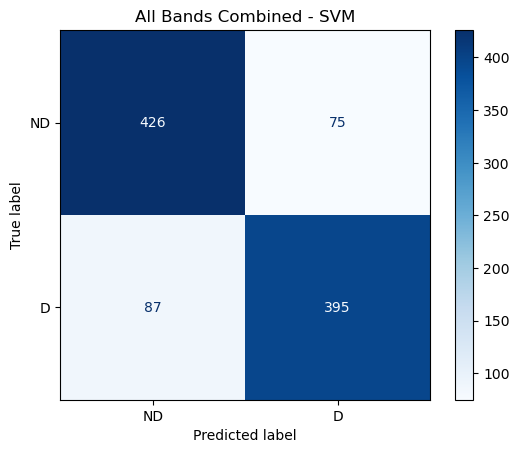

Mean Accuracy: 0.84
Standard Deviation: 0.03


In [19]:
# Combine data and labels
X = np.concatenate((epochs_D.get_data(), epochs_ND.get_data()), axis=0)
y = np.concatenate((labels_D, labels_ND), axis=0)

# Define frequency bands
bands = {
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (12, 30),
}

# Calculate PSD for each epoch and each band
def calculate_psd(epochs, bands):
    psd_features = []
    for epoch in epochs:
        psd_epoch = []
        for band, (fmin, fmax) in bands.items():
            psd, freqs = mne.time_frequency.psd_array_multitaper(epoch, sfreq=epochs_D.info['sfreq'], fmin=fmin, fmax=fmax, verbose=False)
            psd_band = np.mean(psd, axis=1)  # Average PSD across frequencies
            psd_epoch.extend(psd_band)
        psd_features.append(psd_epoch)
    return np.array(psd_features)

psd_features = calculate_psd(X, bands)

# Define the SVM classifier
classifier = SVC(kernel='linear')

# Function to evaluate the SVM classifier and print results
def evaluate_classifier(features, classifier, y):
    n_splits = 5
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    fold_accuracies = []
    y_true_combined = []
    y_pred_combined = []
    for train_index, test_index in kf.split(features, y):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        classifier.fit(X_train, y_train)
        
        # Evaluate on the test set
        y_pred = classifier.predict(X_test)
        test_score = classifier.score(X_test, y_test)
        fold_accuracies.append(test_score)
        
        # Accumulate predictions and true labels
        y_true_combined.extend(y_test)
        y_pred_combined.extend(y_pred)
    
    # Print results
    print(f'SVM: {np.mean(fold_accuracies):.2f} ± {np.std(fold_accuracies):.2f}')
    
    # Plot the confusion matrix for combined folds
    plot_conf_matrix(np.array(y_true_combined), np.array(y_pred_combined), 'All Bands Combined - SVM')
    return np.mean(fold_accuracies), np.std(fold_accuracies)

# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ND', 'D'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Evaluate the SVM classifier for all bands combined
mean_accuracy, std_accuracy = evaluate_classifier(psd_features, classifier, y)

# Print the results
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')

# Save the results to a CSV file
participant_id = '1'  # Change this to the appropriate participant ID
results_df = pd.DataFrame({'Participant': [participant_id], 'Mean Accuracy': [mean_accuracy], 'Standard Deviation': [std_accuracy]})
results_df.to_csv('classification_results_2.csv', mode='a', index=False, header=False)